In [3]:
# import needed libraries.
import pandas as pd
import geopandas as gpd # geographic data manipulation
import numpy as np

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

#this is for the heatmap.
import folium
from folium.plugins import HeatMap

from google.colab import drive #to mount google drive to the vm
import shutil

import os
!pip install python-dotenv
from dotenv import load_dotenv
import requests
import time


In [4]:
# Load the .env file
load_dotenv('/content/.env')
# Mount Google Drive (need to be run only once! and is valid when working on Google Colab)
# drive.mount('/content/drive')

True

In [ ]:
# download the dataset from google drive.
# Download the file from Google Drive using the file ID
!gdown {os.getenv('raw_business_data')}
!gdown {os.getenv('businesses-coords')}
!gdown {os.getenv('taxi-geojason')}

In [ ]:
#load csv file into a pandas dataframe
df = pd.read_csv("/content/Legally_Operating_Businesses_20240618.csv")

<ipython-input-4-0067036c17a8>:2: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Legally_Operating_Businesses_20240618.csv")


In [ ]:
#show a sample of the data
df.tail()

DCA License Number License Type License Expiration Date License Status  \
281408        0893326-DCA     Business              07/31/2025         Active   
281409        1016863-DCA   Individual              05/31/2013       Inactive   
281410      2035916-1-DCA     Business              12/31/2023       Inactive   
281411      2068245-1-DCA     Business              11/30/2023         Active   
281412        2078573-DCA     Business              09/15/2020       Inactive   

       License Creation Date                     Industry  \
281408            06/11/2003  Secondhand Dealer - General   
281409            02/20/2012                    Locksmith   
281410            04/12/2016        Tobacco Retail Dealer   
281411            03/23/2018  Electronic Cigarette Dealer   
281412            09/26/2018                Sidewalk Cafe   

                                Business Name  Business Name 2  \
281408  1672 62ND STREET R & J COLLISION INC.              NaN   
281409                         ENNAB, AIMAN C              NaN   
281410                COLUMBIA SMOKE SHOP INC              NaN   
281411                          AYESHA R CORP    BROADWAY CAFE   
281412          HAMILTON RESTAURANT GROUP INC  BUDDHA TACO BAR   

       Address Building Address Street Name  ... Community Board  \
281408             1672             62ND ST  ...           311.0   
281409              NaN                 NaN  ...             NaN   
281410              974       AMSTERDAM AVE  ...           107.0   
281411             4109            BROADWAY  ...           401.0   
281412             3620            BROADWAY  ...           109.0   

       Council District      BIN         BBL   NTA Census Tract  \
281408             43.0  3132716  3055310036   NaN          NaN   
281409              NaN      NaN         NaN   NaN          NaN   
281410              7.0  1056659  1018790036  MN09        195.0   
281411             22.0  4011160  4006790005  MN36        263.0   
281412              7.0  1062077  1020810001  MN04        233.0   

                                                   Detail  Longitude  \
281408                                                NaN -73.991506   
281409                                                NaN        NaN   
281410                                                NaN -73.964838   
281411                                                NaN -73.917838   
281412  Sidewalk Cafe Type: Unenclosed, Square Feet: 1... -73.948516   

         Latitude                                  Location  
281408  40.622725    (40.6227250292715, -73.99150583174155)  
281409        NaN                                       NaN  
281410  40.801648    (40.80164819608709, -73.9648375762399)  
281411  40.758439   (40.75843859241419, -73.91783790657657)  
281412  40.829065  (40.829064565437044, -73.94851559726504)  

[5 rows x 27 columns]

In [ ]:
#number of rows and cols
df.shape

(281413, 27)

In [ ]:
#check the data types
df.dtypes

DCA License Number                object
License Type                      object
License Expiration Date           object
License Status                    object
License Creation Date             object
Industry                          object
Business Name                     object
Business Name 2                   object
Address Building                  object
Address Street Name               object
Secondary Address Street Name     object
Address City                      object
Address State                     object
Address ZIP                       object
Contact Phone Number              object
Address Borough                   object
Borough Code                     float64
Community Board                  float64
Council District                 float64
BIN                               object
BBL                               object
NTA                               object
Census Tract                     float64
Detail                            object
Longitude       

In [ ]:
#columns to drop
# cols_to_drop = ["DCA License Number","License Creation Date","Contact Phone Number"]

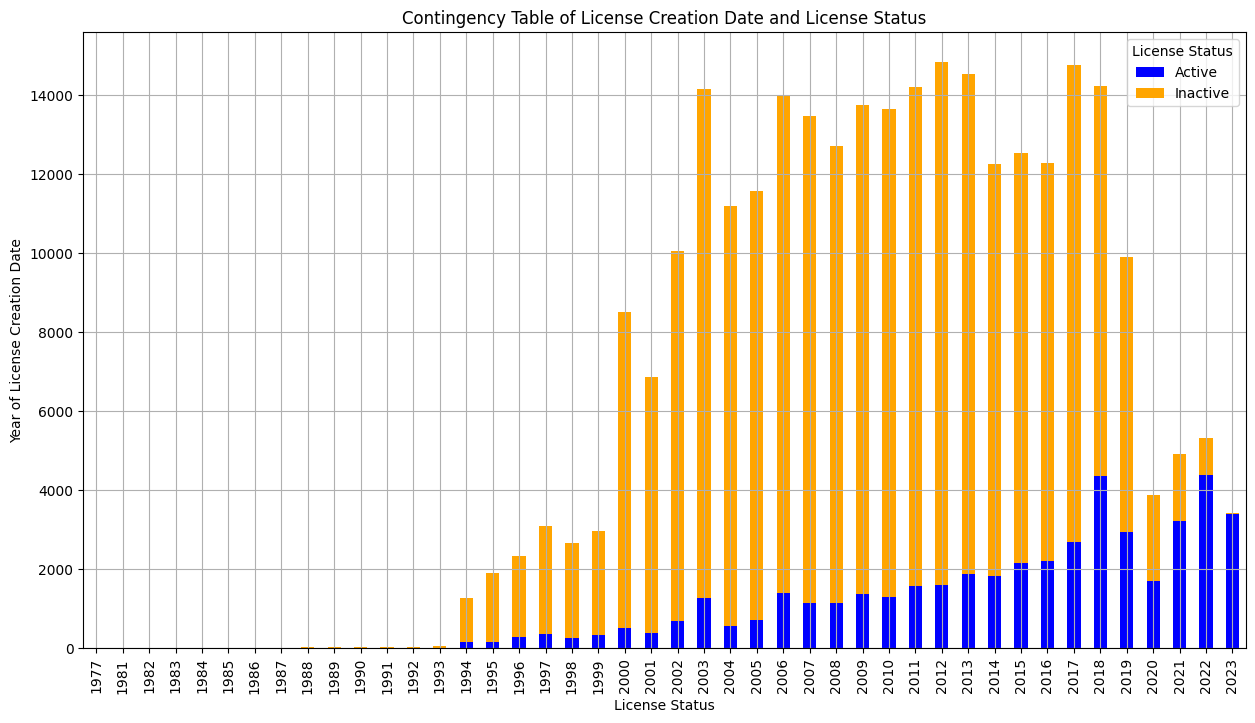

In [ ]:
# Convert 'License Expiration Date' to datetime format
df['License Creation Date'] = pd.to_datetime(df['License Creation Date'])

# Extract the year from 'License Expiration Date'
df['Year'] = df['License Creation Date'].dt.year

# Filter the DataFrame to include only 'Active' and 'Inactive' statuses
df = df[df['License Status'].isin(['Active', 'Inactive'])]

# Create a contingency table
contingency_table = pd.crosstab(df['License Status'],df['Year'])

contingency_table.T.plot(kind='bar', stacked=True, figsize=(15, 8), color=['blue', 'orange'])
plt.title('Contingency Table of License Creation Date and License Status')
plt.xlabel('License Status')
plt.ylabel('Year of License Creation Date')
plt.grid()
plt.show()

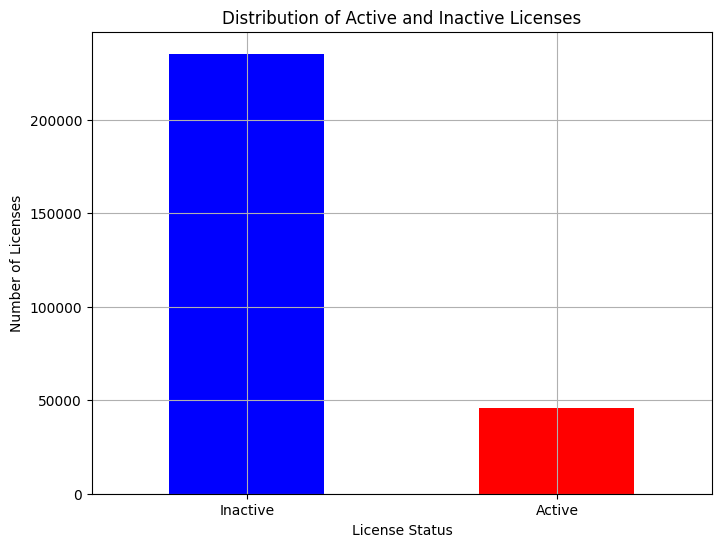

In [ ]:
# Count the number of 'Active' and 'Inactive' statuses
status_counts = df['License Status'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Active and Inactive Licenses')
plt.xlabel('License Status')
plt.ylabel('Number of Licenses')
plt.xticks(rotation=0)
plt.grid()
plt.show()


In [ ]:
#drop rows where the state is not new york
df = df[df['Address State'] == 'NY']


In [ ]:
df.shape

(266447, 27)

In [ ]:
base_map = folium.Map(location=[40.7128, -74.0060], zoom_start=13)
df = df.dropna(subset=['Latitude', 'Longitude'])
# Prepare data for heatmap
heat_data = df[['Latitude', 'Longitude']].values.tolist()

# Add heatmap to the base map
HeatMap(heat_data).add_to(base_map)

base_map

In [ ]:
# Replace empty strings, spaces, and tabs with NaN using regex
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
df.head()

DCA License Number License Type License Expiration Date License Status  \
18        0365714-DCA     Business              03/31/2005       Inactive   
19        1076184-DCA     Business              12/31/2004       Inactive   
23        2061591-DCA     Business              12/31/2021       Inactive   
24        2009334-DCA     Business              05/23/2020       Inactive   
26        2038840-DCA     Business              07/31/2021       Inactive   

   License Creation Date                     Industry  \
18            1997-04-08                       Garage   
19            2001-04-02        Tobacco Retail Dealer   
23            2017-11-25                    Laundries   
24            2014-06-09                Sidewalk Cafe   
26            2016-06-09  Secondhand Dealer - General   

                           Business Name       Business Name 2  \
18  THE GARDENS 75TH STREET OWNERS CORP.                   NaN   
19                 JALIL, MOHAMMED ABDUL  SUNRISE DELICATESSEN   
23              SING WAH LAUNDROMAT INC.                   NaN   
24              DCB DELANCEY CORPORATION              SEL ROSE   
26           MD BROADWAY ELECTRONICS LLC                   NaN   

   Address Building Address Street Name  ... Council District      BIN  \
18             3538             75TH ST  ...             25.0  4029562   
19             2017          CHURCH AVE  ...             40.0  3116556   
23             6914             4TH AVE  ...             43.0  3145701   
24                1         DELANCEY ST  ...              1.0  1005662   
26             1888          JEROME AVE  ...             14.0  2013962   

           BBL   NTA Census Tract  \
18  4012740020  QN28        289.0   
19  3050810039  BK42      50801.0   
23  3058720047  BK31         68.0   
24  1004240012  MN27         18.0   
26  2031790031   NaN          NaN   

                                               Detail  Longitude   Latitude  \
18                Vehicle Spaces: 85, Bicycle Spaces: -73.891136  40.750745   
19                                                NaN -73.960737  40.650123   
23                       Laundry Type: Retail Laundry -74.023621  40.634397   
24  Sidewalk Cafe Type: Regular Unenclosed/Small U... -73.993820  40.720242   
26                                                NaN -73.906078  40.855206   

                                    Location  Year  
18   (40.75074488262595, -73.89113569640881)  1997  
19    (40.6501225946322, -73.96073707845565)  2001  
23   (40.63439650603149, -74.02362065616948)  2017  
24  (40.720241568328824, -73.99382027141543)  2014  
26   (40.85520587133494, -73.90607848934312)  2016  

[5 rows x 28 columns]

In [ ]:
df.tail()

DCA License Number License Type License Expiration Date License Status  \
281406        2115029-DCA     Business              12/31/2024         Active   
281408        0893326-DCA     Business              07/31/2025         Active   
281410      2035916-1-DCA     Business              12/31/2023       Inactive   
281411      2068245-1-DCA     Business              11/30/2023         Active   
281412        2078573-DCA     Business              09/15/2020       Inactive   

       License Creation Date                     Industry  \
281406            2023-07-12            Electronics Store   
281408            2003-06-11  Secondhand Dealer - General   
281410            2016-04-12        Tobacco Retail Dealer   
281411            2018-03-23  Electronic Cigarette Dealer   
281412            2018-09-26                Sidewalk Cafe   

                                Business Name  Business Name 2  \
281406           GALAXY LATINO GIFT SHOP CORP              NaN   
281408  1672 62ND STREET R & J COLLISION INC.              NaN   
281410                COLUMBIA SMOKE SHOP INC              NaN   
281411                          AYESHA R CORP    BROADWAY CAFE   
281412          HAMILTON RESTAURANT GROUP INC  BUDDHA TACO BAR   

       Address Building Address Street Name  ... Council District      BIN  \
281406             4104             5TH AVE  ...             38.0  3010746   
281408             1672             62ND ST  ...             43.0  3132716   
281410              974       AMSTERDAM AVE  ...              7.0  1056659   
281411             4109            BROADWAY  ...             22.0  4011160   
281412             3620            BROADWAY  ...              7.0  1062077   

               BBL   NTA Census Tract  \
281406  3007190041   NaN          NaN   
281408  3055310036   NaN          NaN   
281410  1018790036  MN09        195.0   
281411  4006790005  MN36        263.0   
281412  1020810001  MN04        233.0   

                                                   Detail  Longitude  \
281406                                                NaN -74.005189   
281408                                                NaN -73.991506   
281410                                                NaN -73.964838   
281411                                                NaN -73.917838   
281412  Sidewalk Cafe Type: Unenclosed, Square Feet: 1... -73.948516   

         Latitude                                  Location  Year  
281406  40.650050   (40.65004958074599, -74.00518940278018)  2023  
281408  40.622725    (40.6227250292715, -73.99150583174155)  2003  
281410  40.801648    (40.80164819608709, -73.9648375762399)  2016  
281411  40.758439   (40.75843859241419, -73.91783790657657)  2018  
281412  40.829065  (40.829064565437044, -73.94851559726504)  2018  

[5 rows x 28 columns]

In [ ]:
#count the number of rows that for which the zip code is missing or N/A
missing_zip_count = df['Address ZIP'].isna().sum()

print(f"The number of rows with missing 'Address ZIP': {missing_zip_count}")
print(f"Percentage rows with missing 'Address ZIP': {100*(missing_zip_count/df.shape[0])}")

The number of rows with missing 'Address ZIP': 20
Percentage rows with missing 'Address ZIP': 0.011519675605934936


In [ ]:
# List of columns to check for missing values
columns_to_check = ['BIN', 'BBL', 'Latitude', 'Longitude','Address Building','Address Street Name']

# Count the number of rows where all of the specified columns have missing values
missing_count = df[columns_to_check].isna().all(axis=1).sum()

print(f"The number of rows for which the address cannot be found: {missing_count}")
print(f"The associated percentage of rows: {100*(missing_count/df.shape[0])}")

The number of rows for which the address cannot be found: 0
The associated percentage of rows: 0.0


In [ ]:
#count the number of rows that for which the Location is missing or N/A
missing_census_tract_count = df['Census Tract'].isna().sum()

print(f"The number of rows with missing 'Location': {missing_census_tract_count}")
print(f"Percentage rows with missing 'Location': {100*(missing_census_tract_count/df.shape[0])}")

The number of rows with missing 'Location': 36706
Percentage rows with missing 'Location': 21.142060639572392


In [21]:
def find_address_candidates(single_line, token):
    base_url = "https://locatenyc.io/arcgis/rest/services/locateNYC/v1/GeocodeServer/findAddressCandidates/"

    params = {
        "singleLine": single_line,
        "token": token
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        address_candidates = response.json()
        return address_candidates
    else:
        return f"Error: {response.status_code}"

# Example usage
single_line_address = "3032520003"

api_token = os.getenv('locate_ny_token')
address_candidates = find_address_candidates(single_line_address, api_token)

print(f"Address candidates for '{single_line_address}':")
print(address_candidates)


Address candidates for '3032520003':
{'spatialReference': {'wkid': 4326, 'latestWkid': 4326}, 'candidates': [{'address': 'Borough:3 Block:03252 Lot:0003', 'location': {'x': -73.92781702862385, 'y': 40.69317764352964}, 'score': 100, 'attributes': {'bbl': '3032520003', 'bblBoroughCode': '3', 'bblBoroughCodeIn': '', 'bblTaxBlock': '03252', 'bblTaxBlockIn': '', 'bblTaxLot': '0003', 'bblTaxLotIn': '', 'buildingIdentificationNumber': '3000000', 'businessImprovementDistrict': '', 'condominiumBillingBbl': '0000000000', 'cooperativeIdNumber': '0000', 'cornerCode': '', 'dcpCommercialStudyArea': '33008', 'firstBoroughName': 'BROOKLYN', 'geosupportFunctionCode': 'BL', 'geosupportMessage': '', 'geosupportReturnCode': '00', 'geosupport_release': '23b', 'geosupport_release_date': 'May 2023', 'geosupport_version': '23.2', 'gi5DigitStreetCode1': '23230', 'gi5DigitStreetCode2': '23230', 'gi5DigitStreetCode3': '23230', 'gi5DigitStreetCode4': '54110', 'gi5DigitStreetCode5': '54120', 'giBoroughCode1': '3',

In [ ]:
def find_address_candidates(single_line, token):
    base_url = "https://locatenyc.io/arcgis/rest/services/locateNYC/v1/GeocodeServer/findAddressCandidates/"

    params = {
        "singleLine": single_line,
        "token": token
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        address_candidates = response.json()
        return address_candidates
    else:
        return f"Error: {response.status_code}"

def update_lat_long(df, token):
    total_rows = len(df)
    for index, row in df.iterrows():
        if pd.isna(row['Latitude']) or pd.isna(row['Longitude']):
            single_line_address = None

            # Determine the single line address to use
            if pd.notna(row['BIN']):
                single_line_address = row['BIN']
            elif pd.notna(row['BBL']):
                single_line_address = row['BBL']
            elif pd.notna(row['Address Building']) and pd.notna(row['Address Street Name']):
                single_line_address = f"{row['Address Building']} {row['Address Street Name']}"

            if single_line_address:
                response = find_address_candidates(single_line_address, token)
                if isinstance(response, dict) and 'candidates' in response and len(response['candidates']) > 0:
                    best_candidate = response['candidates'][0]
                    df.at[index, 'Latitude'] = best_candidate['location']['y']
                    df.at[index, 'Longitude'] = best_candidate['location']['x']

        # Log the percentage of processed rows
        processed_percentage = (index + 1) / total_rows * 100
        print(f"Processed {processed_percentage:.2f}% of rows")

        time.sleep(0.05)

    return df


api_token = os.getenv('locate_ny_token')

# Update DataFrame with Latitude and Longitude
updated_df = update_lat_long(df, api_token)




In [25]:
#export updated_df to csv
updated_df.to_csv('updated_df.csv', index=False)

In [27]:
updated_df.shape

(173616, 28)

In [ ]:
#count the number of unique Industry and return the unique values
unique_industries = df['Industry'].nunique()

print(f"The number of unique industries: {unique_industries}")

The number of unique industries: 49


In [ ]:
unique_industries = df['Industry'].unique()
unique_industries

array(['Garage', 'Tobacco Retail Dealer', 'Laundries', 'Sidewalk Cafe',
       'Secondhand Dealer - General', 'Electronic & Appliance Service',
       'Employment Agency', 'Home Improvement Contractor',
       'Electronic Cigarette Dealer', 'Newsstand', 'Electronics Store',
       'Stoop Line Stand', 'Tow Truck Company',
       'Secondhand Dealer - Auto', 'Garage and Parking Lot',
       'Bingo Game Operator', 'Parking Lot', 'Laundry', 'Pawnbroker',
       'Process Serving Agency', 'Car Wash', 'Dealer In Products',
       'Laundry Jobber', 'Construction Labor Provider',
       'Pedicab Business', 'Special Sale', 'Third Party Food Delivery',
       'Pool or Billiard Room', 'Scrap Metal Processor',
       'Catering Establishment', 'Tow Truck Exemption',
       'Ticket Seller Business', 'Horse Drawn Cab Owner',
       'Auction House Premises', 'Amusement Device Temporary',
       'Amusement Device Permanent', 'Games of Chance',
       'Storage Warehouse', 'Gaming Cafe', 'Amusement Arcade'

In [79]:
df = pd.read_csv('/content/businesses_coords.csv')

<ipython-input-79-c78a558eb859>:1: DtypeWarning: Columns (13,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/businesses_coords.csv')


In [80]:
df.dtypes

DCA License Number                object
License Type                      object
License Expiration Date           object
License Status                    object
License Creation Date             object
Industry                          object
Business Name                     object
Business Name 2                   object
Address Building                  object
Address Street Name               object
Secondary Address Street Name     object
Address City                      object
Address State                     object
Address ZIP                       object
Contact Phone Number              object
Address Borough                   object
Borough Code                     float64
Community Board                  float64
Council District                 float64
BIN                               object
BBL                               object
NTA                               object
Census Tract                     float64
Detail                            object
Longitude       

In [81]:
#assign taxi zones to locations.
# Load GeoJSON data into a GeoDataFrame
def load_geojson_gpd(filepath):
    return gpd.read_file(filepath)

# Function to find zones using spatial join in geopandas
def assign_zones(df, gdf):
    # Convert DataFrame to GeoDataFrame
    gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
    gdf_points.set_crs(gdf.crs, inplace=True)

    # Spatial join points to polygons
    joined = gpd.sjoin(gdf_points, gdf, how="left", op='within')
    return joined['location_id']

# Load GeoJSON data into a GeoDataFrame
geo_df = load_geojson_gpd('/content/NYC Taxi Zones.geojson')


# Assign zones using the efficient spatial join
df['zone_id'] = assign_zones(df, geo_df)

df.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


DCA License Number License Type License Expiration Date License Status  \
0        0365714-DCA     Business              03/31/2005       Inactive   
1        1076184-DCA     Business              12/31/2004       Inactive   
2        2061591-DCA     Business              12/31/2021       Inactive   
3        2009334-DCA     Business              05/23/2020       Inactive   
4        2038840-DCA     Business              07/31/2021       Inactive   

  License Creation Date                     Industry  \
0            1997-04-08                       Garage   
1            2001-04-02        Tobacco Retail Dealer   
2            2017-11-25                    Laundries   
3            2014-06-09                Sidewalk Cafe   
4            2016-06-09  Secondhand Dealer - General   

                          Business Name       Business Name 2  \
0  THE GARDENS 75TH STREET OWNERS CORP.                   NaN   
1                 JALIL, MOHAMMED ABDUL  SUNRISE DELICATESSEN   
2              SING WAH LAUNDROMAT INC.                   NaN   
3              DCB DELANCEY CORPORATION              SEL ROSE   
4           MD BROADWAY ELECTRONICS LLC                   NaN   

  Address Building Address Street Name  ...      BIN           BBL   NTA  \
0             3538             75TH ST  ...  4029562  4012740020.0  QN28   
1             2017          CHURCH AVE  ...  3116556  3050810039.0  BK42   
2             6914             4TH AVE  ...  3145701  3058720047.0  BK31   
3                1         DELANCEY ST  ...  1005662  1004240012.0  MN27   
4             1888          JEROME AVE  ...  2013962  2031790031.0   NaN   

  Census Tract                                             Detail  Longitude  \
0        289.0                Vehicle Spaces: 85, Bicycle Spaces: -73.891136   
1      50801.0                                                NaN -73.960737   
2         68.0                       Laundry Type: Retail Laundry -74.023621   
3         18.0  Sidewalk Cafe Type: Regular Unenclosed/Small U... -73.993820   
4          NaN                                                NaN -73.906078   

    Latitude                                  Location  Year zone_id  
0  40.750745   (40.75074488262595, -73.89113569640881)  1997     129  
1  40.650123    (40.6501225946322, -73.96073707845565)  2001      89  
2  40.634397   (40.63439650603149, -74.02362065616948)  2017      14  
3  40.720242  (40.720241568328824, -73.99382027141543)  2014     148  
4  40.855206   (40.85520587133494, -73.90607848934312)  2016     169  

[5 rows x 29 columns]

In [82]:
#count the number of missing zone_id
missing_zone_count = df['zone_id'].isna().sum()

print(f"The number of rows with missing 'zone_id': {missing_zone_count}")

The number of rows with missing 'zone_id': 7583


In [ ]:
!gdown {os.getenv('cleaned-taxi-data')}

In [85]:
taxi_df = pd.read_csv('/content/combined_taxi_df.csv')

In [86]:
#count number of zones
unique_zones = taxi_df['zone'].nunique()

print(f"The number of unique zones: {unique_zones}")

The number of unique zones: 67


In [87]:
#get the unique taxi zones
unique_zones = taxi_df['zone'].unique()
unique_zones = [  4,  13,  24,  41,  42,  43,  45,  48,  50,  68,  74,  75,  79,
        87,  88,  90, 100, 107, 113, 114, 116, 125, 137, 140, 141, 142,
       143, 144, 148, 151, 152, 158, 161, 162, 163, 164, 166, 170, 186,
       211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 244,
       246, 249, 261, 262, 263, 127, 128, 202, 209, 243,  12, 153, 194,
       120, 105]

unique_zones_str = [str(zone) for zone in unique_zones]

In [88]:
#drop all rows in the df for which the zone_id is not in the unique_zones
df = df[df['zone_id'].isin(unique_zones_str)]

In [89]:
df.shape

(39514, 29)

In [90]:
#change zone id to int
df['zone_id'] = df['zone_id'].astype(int)

<ipython-input-90-2a415d82d4c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zone_id'] = df['zone_id'].astype(int)


In [98]:
df.dtypes

DCA License Number                object
License Type                      object
License Expiration Date           object
License Status                    object
License Creation Date             object
Industry                          object
Business Name                     object
Business Name 2                   object
Address Building                  object
Address Street Name               object
Secondary Address Street Name     object
Address City                      object
Address State                     object
Address ZIP                       object
Contact Phone Number              object
Address Borough                   object
Borough Code                     float64
Community Board                  float64
Council District                 float64
BIN                               object
BBL                               object
NTA                               object
Census Tract                     float64
Detail                            object
Longitude       

In [92]:
df.head()

DCA License Number License Type License Expiration Date License Status  \
3         2009334-DCA     Business              05/23/2020       Inactive   
5         2104048-DCA     Business              06/30/2024         Active   
9         1191726-DCA     Business              06/30/2009       Inactive   
12        1382144-DCA     Business              08/17/2020       Inactive   
13      2074087-1-DCA     Business              11/30/2023         Active   

   License Creation Date                        Industry  \
3             2014-06-09                   Sidewalk Cafe   
5             2022-02-22  Electronic & Appliance Service   
9             2007-09-26     Home Improvement Contractor   
12            2011-02-09                   Sidewalk Cafe   
13            2018-06-21     Electronic Cigarette Dealer   

                          Business Name    Business Name 2 Address Building  \
3              DCB DELANCEY CORPORATION           SEL ROSE                1   
5                       L & F Group Inc                NaN               87   
9   F. J. SCIAME CONSTRUCTION CO., INC.                NaN               80   
12                      IL RIFUGIO INC.  TARALLUCCI E VINO              475   
13                       JASANI, MUNIRA                NaN            N/W/C   

   Address Street Name  ...      BIN           BBL   NTA Census Tract  \
3          DELANCEY ST  ...  1005662  1004240012.0  MN27         18.0   
5         ELIZABETH ST  ...  1086597  1002387503.0   NaN          NaN   
9             SOUTH ST  ...  1079058  1000720031.0  MN25       1502.0   
12        COLUMBUS AVE  ...  1031202  1011960061.0  MN12        169.0   
13    WEST   46 STREET  ...      NaN           NaN   NaN          NaN   

                                               Detail  Longitude   Latitude  \
3   Sidewalk Cafe Type: Regular Unenclosed/Small U... -73.993820  40.720242   
5                                                 NaN -73.996014  40.718131   
9                                                 NaN -74.004263  40.705552   
12  Sidewalk Cafe Type: Unenclosed, Square Feet: 1... -73.973697  40.784381   
13                                                NaN -73.982255  40.757388   

                                    Location  Year zone_id  
3   (40.720241568328824, -73.99382027141543)  2014     148  
5     (40.71813094517476, -73.9960137864345)  2022     144  
9    (40.70555169055625, -74.00426318129169)  2007      87  
12  (40.784380716447735, -73.97369731189198)  2011     239  
13   (40.75738784087671, -73.98225540711462)  2018     230  

[5 rows x 29 columns]

In [95]:
#get unique address borough
unique_boroughs = df['Address Borough'].unique()
unique_boroughs

array(['Manhattan', 'MANHATTAN', 'Queens', 'Outside NYC', 'Brooklyn',
       'Bronx', 'Staten Island'], dtype=object)

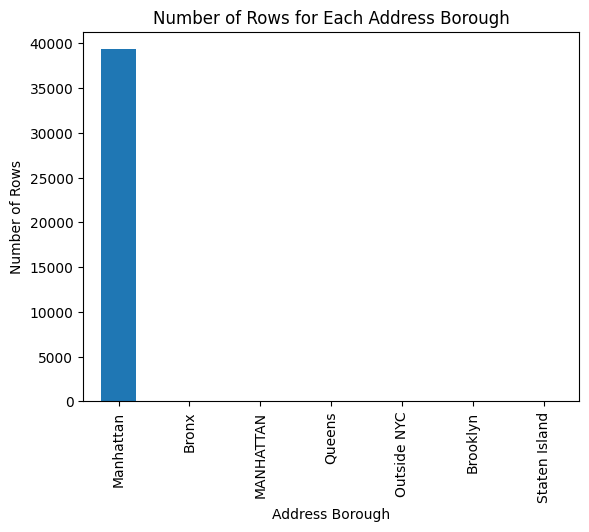

In [101]:
#plot the number of rows for each Address Borough
df['Address Borough'].value_counts().plot(kind='bar')
plt.title('Number of Rows for Each Address Borough')
plt.xlabel('Address Borough')
plt.ylabel('Number of Rows')
plt.show()

In [99]:
#export to csv
df.to_csv('df.csv', index=False)

In [113]:
#get the number of unique industries
unique_industries = df['Industry'].unique()
len(unique_industries)


49

In [108]:
industry_to_category = {
    'Sidewalk Cafe': 'Food, beverages',
    'Electronic & Appliance Service': 'Electronics',
    'Home Improvement Contractor': 'Do-it-yourself, household, building materials, gardening',
    'Electronic Cigarette Dealer': 'General store, department store, mall',
    'Newsstand': 'Stationery, gifts, books, newspapers',
    'Tobacco Retail Dealer': 'General store, department store, mall',
    'Garage': 'Outdoors and sport, vehicles',
    'Laundries': 'Others',
    'Garage and Parking Lot': 'Outdoors and sport, vehicles',
    'Parking Lot': 'Outdoors and sport, vehicles',
    'Employment Agency': 'Financial services',
    'Secondhand Dealer - General': 'General store, department store, mall',
    'Process Serving Agency': 'Others',
    'Dealer In Products': 'General store, department store, mall',
    'Laundry Jobber': 'Others',
    'Pawnbroker': 'Financial services',
    'Electronics Store': 'Electronics',
    'Stoop Line Stand': 'Others',
    'Laundry': 'Others',
    'Tow Truck Company': 'Outdoors and sport, vehicles',
    'Pool or Billiard Room': 'Recreation and parks',
    'Secondhand Dealer - Auto': 'Outdoors and sport, vehicles',
    'Scrap Metal Processor': 'Do-it-yourself, household, building materials, gardening',
    'Third Party Food Delivery': 'Food, beverages',
    'Auction House Premises': 'Financial services',
    'Horse Drawn Cab Owner': 'Outdoors and sport, vehicles',
    'Games of Chance': 'Recreation and parks',
    'Special Sale': 'General store, department store, mall',
    'Car Wash': 'Outdoors and sport, vehicles',
    'Amusement Arcade': 'Recreation and parks',
    'Gaming Cafe': 'Recreation and parks',
    'Debt Collection Agency': 'Financial services',
    'Storage Warehouse': 'Do-it-yourself, household, building materials, gardening',
    'Scale Dealer Repairer': 'Do-it-yourself, household, building materials, gardening',
    'Pedicab Business': 'Outdoors and sport, vehicles',
    'Amusement Device Permanent': 'Recreation and parks',
    'Construction Labor Provider': 'Do-it-yourself, household, building materials, gardening',
    'Amusement Device Temporary': 'Recreation and parks',
    'Cabaret': 'Hospitality',
    'Ticket Seller Business': 'Recreation and parks',
    'Sightseeing Bus': 'Hospitality',
    'General Vendor Distributor': 'General store, department store, mall',
    'Amusement Device Portable': 'Recreation and parks',
    'Bingo Game Operator': 'Recreation and parks',
    'Catering Establishment': 'Food, beverages',
    'Commercial Lessor': 'Financial services',
    'Secondhand Dealer - Firearms': 'Outdoors and sport, vehicles',
    'Tow Truck Exemption': 'Outdoors and sport, vehicles',
    'Booting Company': 'Outdoors and sport, vehicles'
}


In [112]:
#count the number of keys in the dict
len(industry_to_category)

49

In [109]:
df['Sector'] = df['Industry'].map(industry_to_category)


In [111]:
df.head()

DCA License Number License Type License Expiration Date License Status  \
3         2009334-DCA     Business              05/23/2020       Inactive   
5         2104048-DCA     Business              06/30/2024         Active   
9         1191726-DCA     Business              06/30/2009       Inactive   
12        1382144-DCA     Business              08/17/2020       Inactive   
13      2074087-1-DCA     Business              11/30/2023         Active   

   License Creation Date                        Industry  \
3             2014-06-09                   Sidewalk Cafe   
5             2022-02-22  Electronic & Appliance Service   
9             2007-09-26     Home Improvement Contractor   
12            2011-02-09                   Sidewalk Cafe   
13            2018-06-21     Electronic Cigarette Dealer   

                          Business Name    Business Name 2 Address Building  \
3              DCB DELANCEY CORPORATION           SEL ROSE                1   
5                       L & F Group Inc                NaN               87   
9   F. J. SCIAME CONSTRUCTION CO., INC.                NaN               80   
12                      IL RIFUGIO INC.  TARALLUCCI E VINO              475   
13                       JASANI, MUNIRA                NaN            N/W/C   

   Address Street Name  ...           BBL   NTA Census Tract  \
3          DELANCEY ST  ...  1004240012.0  MN27         18.0   
5         ELIZABETH ST  ...  1002387503.0   NaN          NaN   
9             SOUTH ST  ...  1000720031.0  MN25       1502.0   
12        COLUMBUS AVE  ...  1011960061.0  MN12        169.0   
13    WEST   46 STREET  ...           NaN   NaN          NaN   

                                               Detail  Longitude   Latitude  \
3   Sidewalk Cafe Type: Regular Unenclosed/Small U... -73.993820  40.720242   
5                                                 NaN -73.996014  40.718131   
9                                                 NaN -74.004263  40.705552   
12  Sidewalk Cafe Type: Unenclosed, Square Feet: 1... -73.973697  40.784381   
13                                                NaN -73.982255  40.757388   

                                    Location  Year  zone_id  \
3   (40.720241568328824, -73.99382027141543)  2014      148   
5     (40.71813094517476, -73.9960137864345)  2022      144   
9    (40.70555169055625, -74.00426318129169)  2007       87   
12  (40.784380716447735, -73.97369731189198)  2011      239   
13   (40.75738784087671, -73.98225540711462)  2018      230   

                                               Sector  
3                                     Food, beverages  
5                                         Electronics  
9   Do-it-yourself, household, building materials,...  
12                                    Food, beverages  
13              General store, department store, mall  

[5 rows x 30 columns]

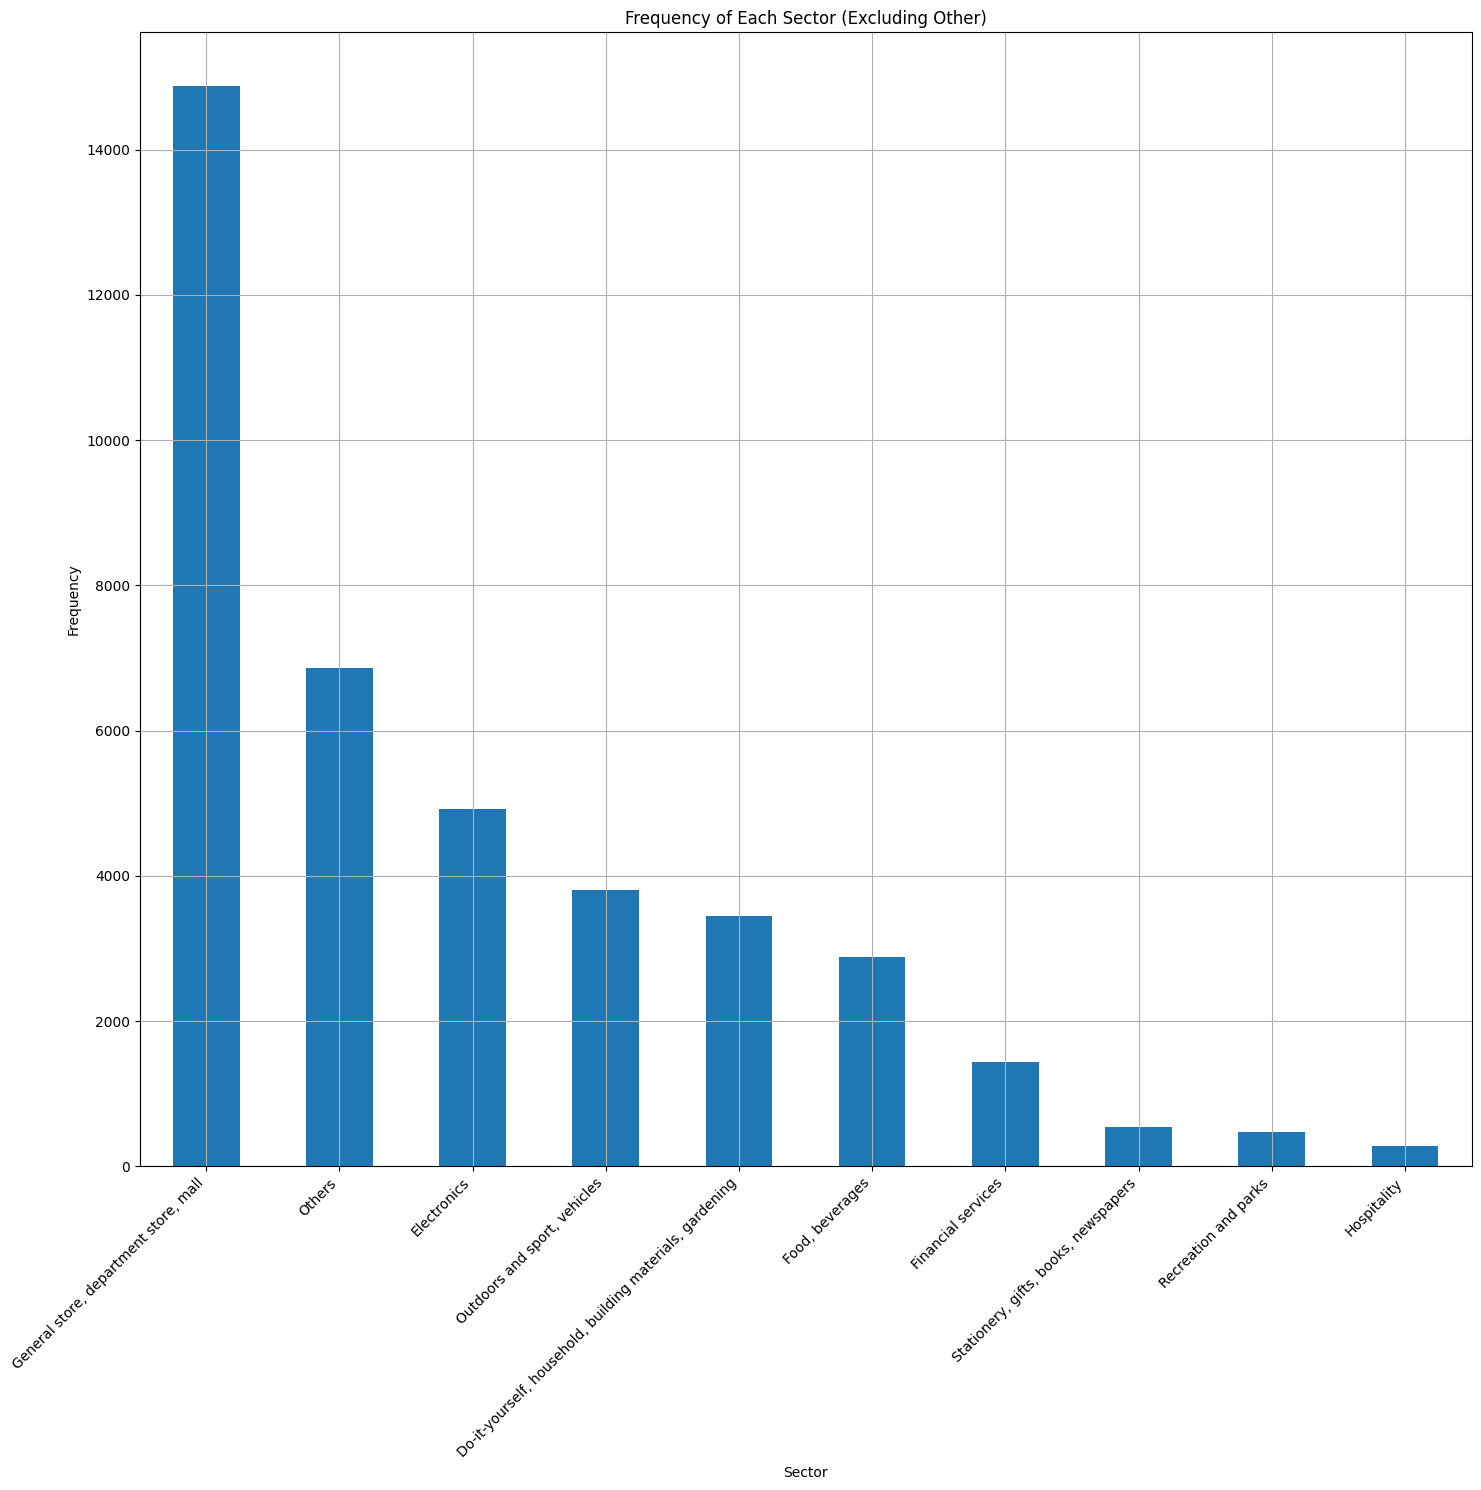

In [110]:

# Calculate the frequency of each sector
sector_counts = df['Sector'].value_counts()

# Plot the frequency of each sector
plt.figure(figsize=(15, 15))
sector_counts.plot(kind='bar')
plt.title('Frequency of Each Sector (Excluding Other)')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
# max_freq = sector_counts.max()

# plt.yticks(range(0, max_freq + 40, 40))
plt.show()

In [115]:
#export df to csv
df.to_csv('df.csv', index=False)